In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Least-squares via row-reduction
---


In [3]:

m = 10
n = 3

# create data
X = np.random.randn(m,n) # "design matrix"
y = np.random.randn(m,1) # "outcome measures (data)"

# try directly applying RREF
Xy = Matrix( np.concatenate([X,y],axis=1) )
print(Xy)
print( Xy.rref() )

Matrix([[0.0327963716163729, -0.0308915008623906, -0.0844188707470381, -0.654117659087085], [0.709311643052916, 1.61548610426391, -0.384898766152420, -0.508200910582985], [0.271032524540809, 1.23965344372185, 0.375089799837909, 0.673754463851970], [1.15456401580073, 0.362194045265567, 0.0479694382129176, -0.260979775043964], [-1.17230340944711, 2.76614394704057, 1.29795961407189, -0.355721155580410], [1.13818398834147, 1.01345372377269, 0.173284199827707, -0.947967057001890], [1.19145560376958, 2.39441032836790, 0.154706174804720, 0.0822120898574872], [-0.652213221442734, -0.575210187244835, 0.234852254932998, 0.772651550999532], [-0.246738159727910, 1.55119581685522, -0.966883589063093, -0.207578556910535], [-0.400313552145350, -0.911434745746853, 1.05859495150872, -1.11302206497864]])
(Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]]), (0, 1, 2, 3))


In [4]:
# now reapply to the normal equations
XtX = np.matrix.transpose(X)@X
Xty = np.matrix.transpose(X)@y
normEQ = Matrix( np.concatenate( [XtX,Xty],axis=1 ) )

Xsol = normEQ.rref()
print(Xsol)
Xsol = Xsol[0]
beta = Xsol[:,-1]

print('')
print(beta)


(Matrix([
[1, 0, 0,  -0.224072824470947],
[0, 1, 0, -0.0207718926314457],
[0, 0, 1,  -0.300685840138469]]), (0, 1, 2))

Matrix([[-0.224072824470947], [-0.0207718926314457], [-0.300685840138469]])

[[-0.22407282]
 [-0.02077189]
 [-0.30068584]]

[[-0.22407282]
 [-0.02077189]
 [-0.30068584]]


In [5]:
# compare to left-inverse
beta2 = np.linalg.inv(XtX) @ Xty
print('')
print(beta2)

# and with the python solver
beta3 = np.linalg.solve(XtX,Xty)
print('')
print(beta3)


[[-0.22407282]
 [-0.02077189]
 [-0.30068584]]

[[-0.22407282]
 [-0.02077189]
 [-0.30068584]]



---
# VIDEO: Least-squares example 1
---


[[0.125]]
[[2.125]] 2.125
[[2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]
 [2.125]]


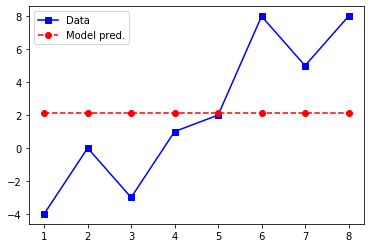

In [10]:
# data. this is the outcome from actual data and coeffficient
data = np.array([[-4,0,-3,1,2,8,5,8]]).T # the ".T" is for transpose
N    = len(data)

# design matrix. 
X = np.ones([N,1])
print(np.linalg.inv(np.matrix.transpose(X)@X))
# fit the model
b = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@data)

# compare against the mean
m = np.mean(data)

# print the results
print(b,m)

# compute the model-predicted values
yHat = X@b
print(yHat)

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]
[[0.        ]
 [0.93571429]
 [1.87142857]
 [2.80714286]
 [3.74285714]
 [4.67857143]
 [5.61428571]
 [6.55      ]]


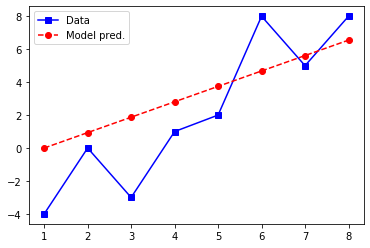

In [12]:
# new design matrix
X = np.array([np.arange(0,N)]).T
print(X)
# fit the model
b = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@data)

# compute the model-predicted values
yHat = X@b
print(yHat)

# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]]
[[ 1.70238095]
 [-3.83333333]]
[[-3.83333333]
 [-2.13095238]
 [-0.42857143]
 [ 1.27380952]
 [ 2.97619048]
 [ 4.67857143]
 [ 6.38095238]
 [ 8.08333333]]


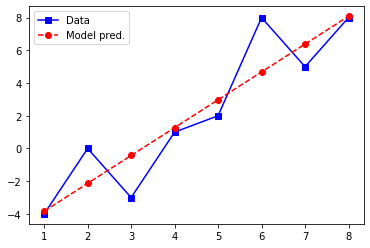

In [18]:
# the above one did not have any intercept when the value of the outcome was not zero
# for example in y = Xb + a, if b(coefficient) is zero, Y(the actual outcome) must be zero. but in this case actual outcome's
# intercept is not zero. so we must add intercept.
# design matrix
X = np.concatenate( [np.ones([N,1]),np.array([np.arange(0,N)]).T],axis=1)
# Here, I have only added 1s column on the left. so when you do just one equation, it will be [Nx2]
# coefficient is now [2x1]. If you just apply one equation with this, it is 1* whatever + n* whatever = outcome data. so 1* whatever
# act as an intercept. the order can be changed. 1s can be added on the right as well.
print(X)
# fit the model
b = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@data)
print(b)
# compute the model-predicted values
yHat = X@b
print(yHat)
# plot data and model prediction
plt.plot(np.arange(1,N+1),data,'bs-',label='Data')
plt.plot(np.arange(1,N+1),yHat,'ro--',label='Model pred.')

plt.legend()
plt.show()


---
# VIDEO: Least-squares example 2
---


dict_keys(['__header__', '__version__', '__globals__', 'EEGdata', 'frex', 'rts'])


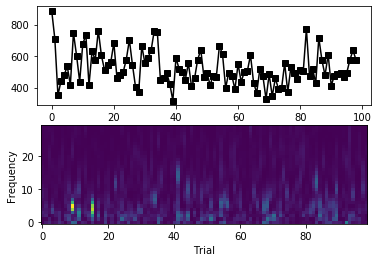

In [23]:

# load data
data = sio.loadmat('EEG_RT_data.mat')
print(data.keys())
rts = data['rts']
rts = rts[0]
EEGdata = data['EEGdata']
frex = data['frex']
frex = frex[0]

nTrials = len(rts)
nFrex = len(frex)


# show the data
plt.subplot(211)
plt.plot(rts,'ks-')
plt.xlabel('Trial')

plt.subplot(212)
plt.imshow(EEGdata,origin='lower')
plt.xlabel('Trial'), plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'beta-coefficient')

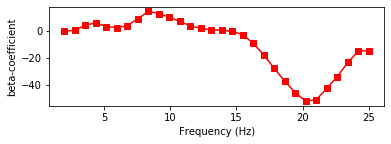

In [27]:
# initialize beta coefficients vector
b = np.zeros(len(frex))

# loop over frequencies
for fi in np.arange(0,len(frex)):
    
    # design matrix
    X = np.concatenate( [np.ones([nTrials,1]),np.reshape(EEGdata[fi,:],(nTrials,1))],axis=1)
    
    # compute parameters
    t = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@rts)
    b[fi] = t[1]


# plots
plt.subplot(211)
plt.plot(frex,b,'rs-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('beta-coefficient')


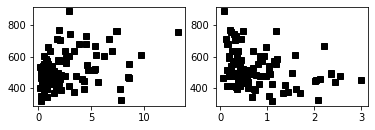

In [28]:
plt.subplot(223)
plt.plot(EEGdata[8,:],rts,'ks')

plt.subplot(224)
plt.plot(EEGdata[23,:],rts,'ks')
plt.show()


In [58]:
#challenge least squares via QR
#genrate random data (design matrix X, data y)
#solve for beta using QR decomp
#compare the QR result against the "stadard left-inverse method"
np.random.seed(0)
X = np.concatenate([np.ones([10,1]), np.random.randint(0,10,(10,3))], axis=1)
output = np.random.rand(10,1)
Q, R = np.linalg.qr(X)
print(np.linalg.inv(R)@Q.T@output)
result = np.linalg.solve(np.matrix.transpose(X)@X,np.matrix.transpose(X)@output)
print(result)

[[ 0.66574736]
 [-0.04854437]
 [-0.01717233]
 [ 0.06175429]]
[[ 0.66574736]
 [-0.04854437]
 [-0.01717233]
 [ 0.06175429]]
